In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../dataset/Padrão Urbano/PU.csv', sep = ';')

In [47]:
from sklearn.model_selection import train_test_split

X= df.drop(['AGL10'], axis=1)

y= df['AGL10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalização
# scaler = MinMaxScaler()
scaler = StandardScaler()

# Fazemos o scaling da validacao e teste, usando info do treino apenas
X_train_norm    = scaler.fit_transform(X_train)
X_val_norm      = scaler.transform(X_val)
X_test_norm     = scaler.transform(X_test)

In [49]:
from sklearn.model_selection import train_test_split, KFold, cross_validate # to split the data
from sklearn.metrics import recall_score, precision_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [50]:
# to feed the random state
seed = 7

# prepare models
models = [
    ('Logistic\nRegression', LogisticRegression()),
    ('Linear\nDiscriminant', LinearDiscriminantAnalysis()),
    ('K-Nearest\nNeighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(gamma='auto')),
    ('XGB', XGBClassifier())
]

# evaluate each model in turn
results = []
names = []
scoring = "precision", "recall", "roc_auc"

kfold = KFold(n_splits=20)
for name, model in models:
    cv_results = cross_validate(model, X_train_norm, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    

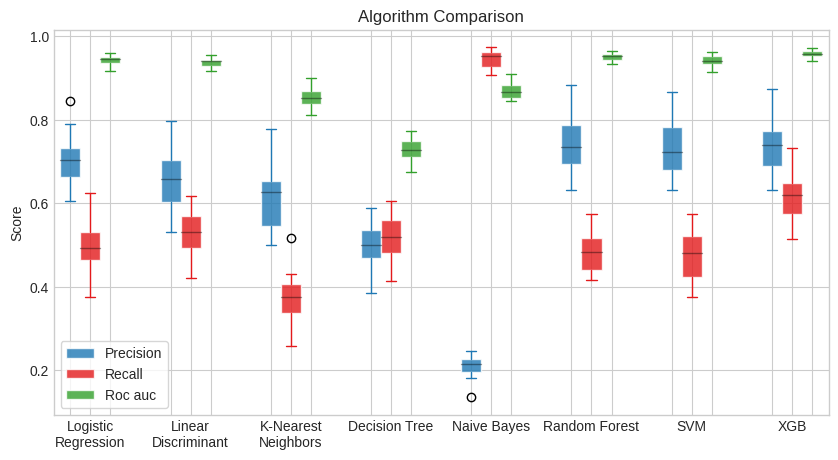

In [51]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('Algorithm Comparison')
boxes = plt.boxplot(np.array([model[metric] for model in results for metric in [f'test_{metric}' for metric in scoring]]).T, positions=[[i+0.4, i, i-0.4][i%3] for i in range(24)], widths=0.6, patch_artist=True)

ax.xaxis.set_major_formatter(lambda x, i : names[i//3] if i%3==1 else '')

for i in range(24):
    color = ["#1f78b4", "#e31a1c", "#33a02c"][i%3]

    boxes['boxes'][i].set_color((1, 1, 1, 0.4))
    boxes['boxes'][i].set(facecolor=color, alpha=0.8)
    boxes['medians'][i].set_color((0, 0, 0, 0.4))
    boxes['whiskers'][2*i].set_color(color)
    boxes['whiskers'][2*i+1].set_color(color)
    boxes['caps'][2*i].set_color(color)
    boxes['caps'][2*i+1].set_color(color)
    boxes['fliers'][i].set_color(color)
    boxes['fliers'][i].set_color(color)

for i in range(3):
    boxes['boxes'][i].set_label(scoring[i].replace('_', ' ').capitalize())


plt.ylabel("Score")
plt.legend(frameon=True)
plt.show()